In [1]:
import numpy as np
#import control as ct
import scipy 
import matplotlib.pyplot as plt
#import simpy as sy

In [2]:
T11 = 2; T12 = 0.3
T21 = 2.5; T22 = 2.5
omegamax =202.946885422
Tmin=26.17


biggamma1 = 1e0 / (T12 * omegamax)
smallgamma1 = 1e0 / (T11 * omegamax)
biggamma2 = 1e0 / (T22 * omegamax)
smallgamma2 = 1e0 / (T21 * omegamax)

In [3]:
#Escribiendo el Hamiltoniano de manera afin con
# H = H_0 + H_1 u
# H0 =  -p_1 * biggamma_1 *y_1 + smallgamma_1 *p_2 *(1-z_1) - biggamma_2 *p_3 y_2 + smallgamma_2* p_4*(1-z_2)
# H1 = -p_1*z_1 + p_2* y_1 - p_3* z_2+ p_4*y_2

In [4]:
def H_0(y_1,z_1,y_2,z_2,p_1,p_2,p_3,p_4):
    return  -p_1 * biggamma_1 *y_1 + smallgamma_1 *p_2 *(1-z_1) - biggamma_2 *p_3 *y_2 + smallgamma_2* p_4*(1-z_2)

def H_1(y_1,z_1,y_2,z_2,p_1,p_2,p_3,p_4):
    return -p_1*z_1 + p_2* y_1 - p_3* z_2+ p_4*y_2
        

In [5]:
#[G,F]
def zero_lie_bracket(y_1,z_1,y_2,z_2,p_1,p_2,p_3,p_4):
    partial_y1 = np.array([1,0,0,0]);     partial_z1 = np.array([0,1,0,0])
    partial_y2 = np.array([0,0,1,0]);     partial_z2 = np.array([0,0,0,1])
    delta_1 = smallgamma1 - biggamma1;    delta_2 = smallgamma2 - biggamma2;
    
    sum_1 = (delta_1 * z_1 - smallgamma1)*partial_y1 + delta_1*y_1*partial_z1
    sum_2 = (delta_2 * z_2 - smallgamma2)*partial_y2 + delta_2*y_2*partial_z2
    
    return sum_1 + sum_2

# [[G,F],F]
def first_lie_bracket(y_1,z_1,y_2,z_2,p_1,p_2,p_3,p_4):
    partial_y1 = np.array([1,0,0,0]);     partial_z1 = np.array([0,1,0,0])
    partial_y2 = np.array([0,0,1,0]);     partial_z2 = np.array([0,0,0,1])
    delta_1 = smallgamma1 - biggamma1;    delta_2 = smallgamma2 - biggamma2;
    
    sum_1 = (smallgamma1*(smallgamma1  - 2*biggamma1) - (delta_1 **2)*z_1 )*partial_y1 \
           + (delta_1 **2) *y_1 *partial_z1
    sum_2 =(smallgamma2*(smallgamma2  - 2*biggamma2) - (delta_2 **2)*z_2 )*partial_y2 \
           + (delta_2 **2) *y_2 *partial_z2

    return sum_1 + sum_2
# [[G,F],G]
def second_lie_bracket(y_1,z_1,y_2,z_2,p_1,p_2,p_3,p_4):
    partial_y1 = np.array([1,0,0,0]);     partial_z1 = np.array([0,1,0,0])
    partial_y2 = np.array([0,0,1,0]);     partial_z2 = np.array([0,0,0,1])
    delta_1 = smallgamma1 - biggamma1;    delta_2 = smallgamma2 - biggamma2;
    
    sum_1 = 2*delta_1*y_1 * partial_y1+ (smallgamma1 - 2*delta_1*z_1)*partial_z1
    sum_2 = 2*delta_2*y_2 * partial_y2+ (smallgamma2 - 2*delta_2*z_2)*partial_z2
    
    return sum_1+sum_2

In [6]:
#[H0,H1]
def zero_poisson_bracket(y_1,z_1,y_2,z_2,p_1,p_2,p_3,p_4):
    p = np.array([p_1,p_2,p_3,p_4])
    
    return np.dot(p, zero_lie_bracket(y_1,z_1,y_2,z_2,p_1,p_2,p_3,p_4))

# [[H0,H1],H1]
def first_poisson_bracket(y_1,z_1,y_2,z_2,p_1,p_2,p_3,p_4):
    p = np.array([p_1,p_2,p_3,p_4])
    
    return np.dot(p, first_lie_bracket(y_1,z_1,y_2,z_2,p_1,p_2,p_3,p_4))
# [[H0,H1],H0]
def second_poisson_bracket(y_1,z_1,y_2,z_2,p_1,p_2,p_3,p_4):
    p = np.array([p_1,p_2,p_3,p_4])
    
    return np.dot(p, second_lie_bracket(y_1,z_1,y_2,z_2,p_1,p_2,p_3,p_4))

In [7]:
def u_opt(y1,y2,z1,z2,p1,p2,p3,p4,t):
    H1=H_1(y1,z1,y2,z2,p1,p2,p3,p4)
    if H1==0:
        return -(first_poisson_bracket(y1,z1,y2,z2,p1,p2,p3,p4)/second_poisson_bracket(y1,z1,y2,z2,p1,p2,p3,p4))
    else:
        if H1>0:
            return 1
        if H1<0:
            return -1


In [8]:
def acop(t,Z):
    y1,z1,y2,z2,p1,p2,p3,p4=Z
    y11=-biggamma1*y1 - u_opt(y1,y2,z1,z2,p1,p2,p3,p4,t)*z1
    z11=smallgamma1*(1-z1) + u_opt(y1,y2,z1,z2,p1,p2,p3,p4,t)*y1
    y22=-biggamma2*y2 - u_opt(y1,y2,z1,z2,p1,p2,p3,p4,t)*z2
    z22=smallgamma2*(1-z2) + u_opt(y1,y2,z1,z2,p1,p2,p3,p4,t)*y2
    p11=biggamma1*p1 - p2*u_opt(y1,y2,z1,z2,p1,p2,p3,p4,t)
    p22=smallgamma1*p2 + u_opt(y1,y2,z1,z2,p1,p2,p3,p4,t)*p1
    p33=biggamma2*p3-p4*u_opt(y1,y2,z1,z2,p1,p2,p3,p4,t)
    p44=smallgamma2*p4+u_opt(y1,y2,z1,z2,p1,p2,p3,p4,t)*p3
    return [y11,z11,y22,z22,p11,p22,p33,p44]

In [9]:
landa=1.1
def perdida(P_ini):
    p11,p22,p33,p44 = P_ini
    I=[0,Tmin*landa]
    t=np.linspace(I[0],I[1],1000)
    sol= scipy.integrate.solve_ivp(acop,I,[0,1,0,1,p11,p22,p33,p44],t_eval=t)
    y1f=sol.y[0][-1]
    z1f=sol.y[1][-1]
    y2f=sol.y[2][-1]
    z2f=sol.y[3][-1]
    p3f=sol.y[6][-1]
    p4f=sol.y[7][-1]
    
    return (y2f-p3f)**2+(z2f-p4f)**2
conopt = scipy.optimize.minimize(perdida,[0,0,-0.08,-0.5])
landas=[1.1,1.5,1.8,2]
c_oo=[]
for j in landas:
    landa=j
    c_oo.append(scipy.optimize.minimize(perdida,[0,0,-0.08,-0.5]))
print(c_oo)

[  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 4.773050219799185e-06
        x: [ 1.400e-03  1.414e-03 -1.275e-03  8.917e-01]
      nit: 6
      jac: [ 6.497e-06  5.733e-06  4.621e-03  1.561e-04]
 hess_inv: [[ 1.000e+00  1.638e-05 -9.951e-03  2.298e-04]
            [ 1.638e-05  1.000e+00 -1.625e-03  6.020e-04]
            [-9.951e-03 -1.625e-03  4.592e-01 -2.918e-02]
            [ 2.298e-04  6.020e-04 -2.918e-02  4.438e-01]]
     nfev: 379
     njev: 74,   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.3510234754010006e-13
        x: [ 7.458e-03  7.490e-03 -1.642e-03  8.582e-01]
      nit: 4
      jac: [-3.876e-10 -7.640e-11  5.404e-07  6.148e-07]
 hess_inv: [[ 1.000e+00  1.528e-07 -1.785e-04  2.346e-03]
            [ 1.528e-07  1.000e+00  7.297e-05  2.341e-03]
            [-1.785e-04  7.297e-05  4.285e-01 -3.644e-05]
            [ 2.346e-03  2.341e-03 -3.644e-05  4.282e-01]]
 

## Trayectorias

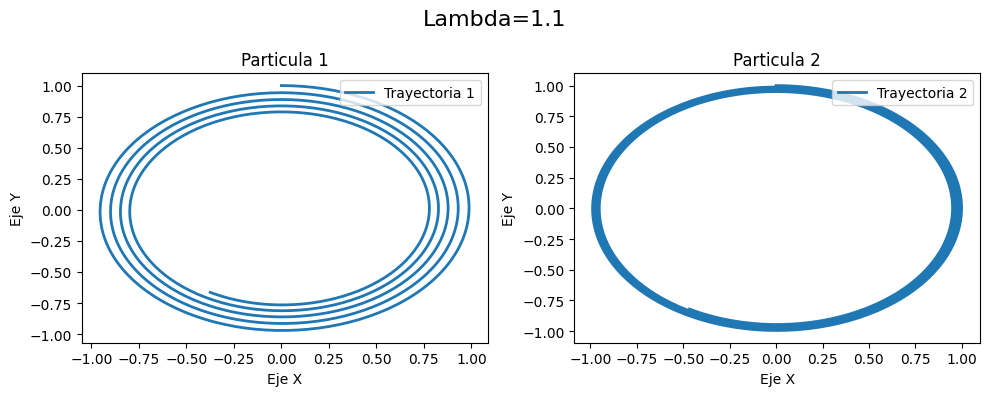

In [10]:
import scipy
from scipy import *
import matplotlib.pyplot as plt
import seaborn as sns
I1 = [0,1.1*Tmin]
t1 = np.linspace(I1[0],I1[1],1000)
sol1 = scipy.integrate.solve_ivp(acop,I1,[0,1,0,1,c_oo[0].x[0],c_oo[0].x[1],c_oo[0].x[2],c_oo[0].x[3]],dense_output=True)
sol11=sol1.sol
zero_values=0
y1_valuesp1 = sol11(t1)[0]
z1_valuesp1 = sol11(t1)[1]
y2_valuesp1 = sol11(t1)[2]
z2_valuesp1 = sol11(t1)[3]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(y1_valuesp1, z1_valuesp1, label='Trayectoria 1', lw=2)
ax1.set_xlabel('Eje X')
ax1.set_ylabel('Eje Y')
ax1.set_title('Particula 1')
ax1.legend(loc='upper right')

# Graficar en el segundo subgráfico
ax2.plot(y2_valuesp1, z2_valuesp1, label='Trayectoria 2', lw=2)
ax2.set_xlabel('Eje X')
ax2.set_ylabel('Eje Y')
ax2.set_title('Particula 2')
ax2.legend(loc='upper right')
# Ajustar el diseño y mostrar los gráficos
fig.suptitle('Lambda=1.1', fontsize=16)
plt.tight_layout()
plt.show()

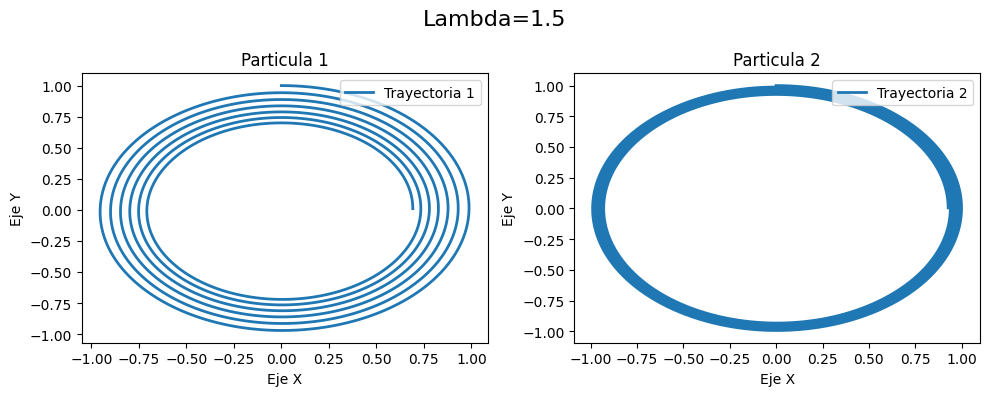

In [12]:
I2 = [0,1.5*Tmin]
t2 = np.linspace(I2[0],I2[1],1000)
sol2 = scipy.integrate.solve_ivp(acop,I2,[0,1,0,1,c_oo[1].x[0],c_oo[1].x[1],c_oo[1].x[2],c_oo[1].x[3]],dense_output=True)
sol22=sol2.sol
zero_values=0
y1_valuesp2 = sol22(t2)[0]
z1_valuesp2 = sol22(t2)[1]
y2_valuesp2 = sol22(t2)[2]
z2_valuesp2 = sol22(t2)[3]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(y1_valuesp2, z1_valuesp2, label='Trayectoria 1', lw=2)
ax1.set_xlabel('Eje X')
ax1.set_ylabel('Eje Y')
ax1.set_title('Particula 1')
ax1.legend(loc='upper right')

# Graficar en el segundo subgráfico
ax2.plot(y2_valuesp2, z2_valuesp2, label='Trayectoria 2', lw=2)
ax2.set_xlabel('Eje X')
ax2.set_ylabel('Eje Y')
ax2.set_title('Particula 2')
ax2.legend(loc='upper right')
# Ajustar el diseño y mostrar los gráficos
fig.suptitle('Lambda=1.5', fontsize=16)
plt.tight_layout()
plt.show()

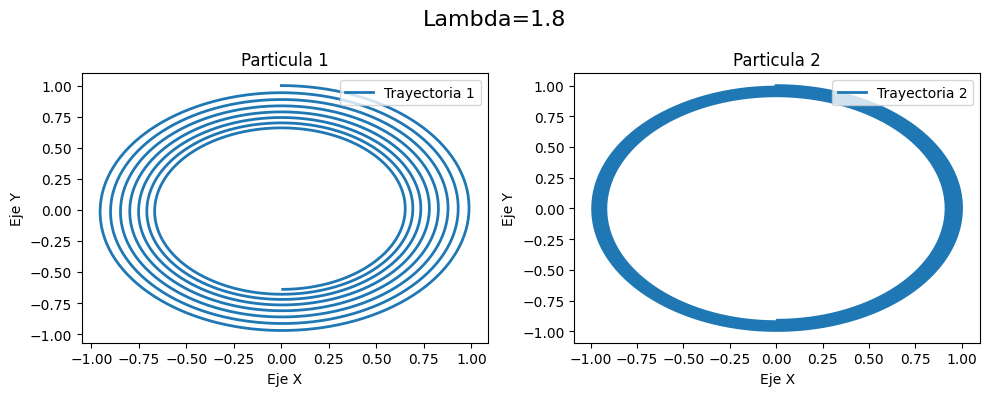

In [13]:
I3 = [0,1.8*Tmin]
t3 = np.linspace(I3[0],I3[1],1000)
sol3 = scipy.integrate.solve_ivp(acop,I3,[0,1,0,1,c_oo[2].x[0],c_oo[2].x[1],c_oo[2].x[2],c_oo[2].x[3]],dense_output=True)
sol33=sol3.sol
zero_values=0
y1_valuesp3 = sol33(t3)[0]
z1_valuesp3 = sol33(t3)[1]
y2_valuesp3 = sol33(t3)[2]
z2_valuesp3 = sol33(t3)[3]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(y1_valuesp3, z1_valuesp3, label='Trayectoria 1', lw=2)
ax1.set_xlabel('Eje X')
ax1.set_ylabel('Eje Y')
ax1.set_title('Particula 1')
ax1.legend(loc='upper right')

# Graficar en el segundo subgráfico
ax2.plot(y2_valuesp3, z2_valuesp3, label='Trayectoria 2', lw=2)
ax2.set_xlabel('Eje X')
ax2.set_ylabel('Eje Y')
ax2.set_title('Particula 2')
ax2.legend(loc='upper right')
# Ajustar el diseño y mostrar los gráficos
fig.suptitle('Lambda=1.8', fontsize=16)
plt.tight_layout()
plt.show()

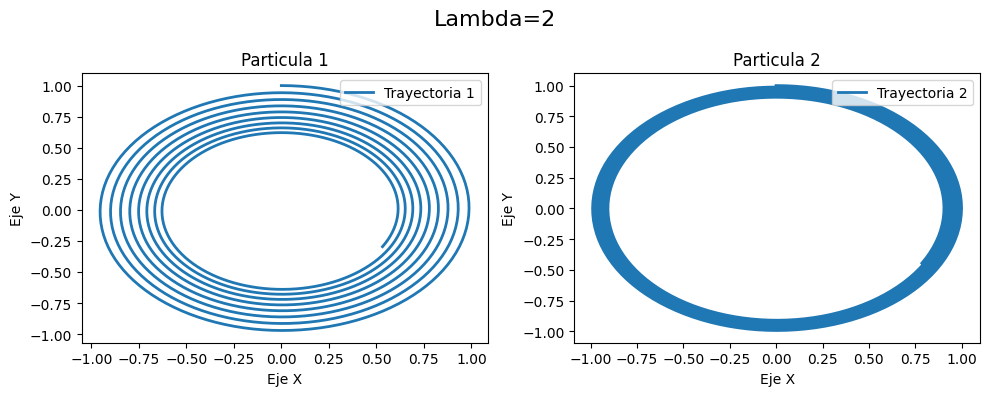

In [14]:
I4 = [0,2*Tmin]
t4 = np.linspace(I4[0],I4[1],1000)
sol4 = scipy.integrate.solve_ivp(acop,I4,[0,1,0,1,c_oo[3].x[0],c_oo[3].x[1],c_oo[3].x[2],c_oo[3].x[3]],dense_output=True)
sol44=sol4.sol
zero_values=0
y1_valuesp3 = sol44(t4)[0]
z1_valuesp3 = sol44(t4)[1]
y2_valuesp3 = sol44(t4)[2]
z2_valuesp3 = sol44(t4)[3]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(y1_valuesp3, z1_valuesp3, label='Trayectoria 1', lw=2)
ax1.set_xlabel('Eje X')
ax1.set_ylabel('Eje Y')
ax1.set_title('Particula 1')
ax1.legend(loc='upper right')

# Graficar en el segundo subgráfico
ax2.plot(y2_valuesp3, z2_valuesp3, label='Trayectoria 2', lw=2)
ax2.set_xlabel('Eje X')
ax2.set_ylabel('Eje Y')
ax2.set_title('Particula 2')
ax2.legend(loc='upper right')
# Ajustar el diseño y mostrar los gráficos
fig.suptitle('Lambda=2', fontsize=16)
plt.tight_layout()
plt.show()

## Gráfico control

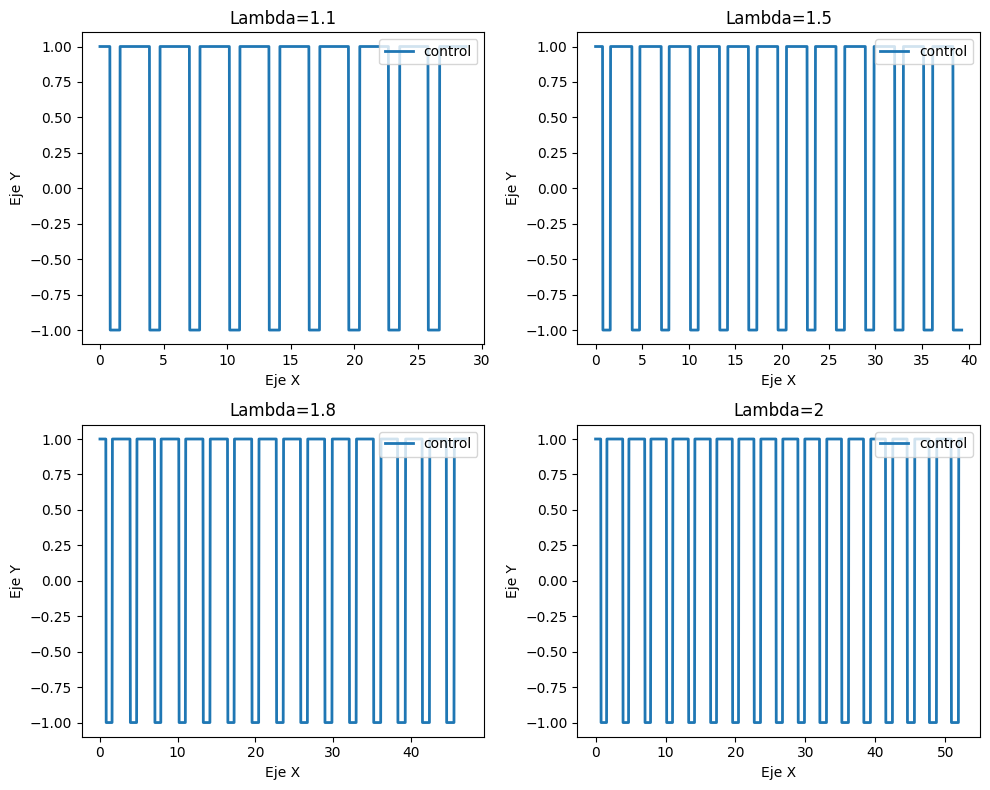

In [24]:
control1=[]
for j in t1:
    control1.append(u_opt(sol11(j)[0],sol11(j)[1],sol11(j)[2],sol11(j)[3],sol11(j)[4],
                          sol11(j)[5],sol11(j)[6],sol11(j)[7],j))
control2=[]
for j in t2:
    control2.append(u_opt(sol22(j)[0],sol22(j)[1],sol22(j)[2],sol22(j)[3],sol22(j)[4],
                          sol22(j)[5],sol22(j)[6],sol22(j)[7],j))
control3=[]
for j in t3:
    control3.append(u_opt(sol33(j)[0],sol33(j)[1],sol33(j)[2],sol33(j)[3],sol33(j)[4],
                          sol33(j)[5],sol33(j)[6],sol33(j)[7],j))
control4=[]
for j in t4:
    control4.append(u_opt(sol44(j)[0],sol44(j)[1],sol44(j)[2],sol44(j)[3],sol44(j)[4],
                          sol44(j)[5],sol44(j)[6],sol44(j)[7],j))
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Graficar en el primer subgráfico (fila 0, columna 0)
axs[0, 0].plot(t1, control1, label='control', lw=2)
axs[0, 0].set_xlabel('Eje X')
axs[0, 0].set_ylabel('Eje Y')
axs[0, 0].set_title('Lambda=1.1')
axs[0, 0].legend(loc='upper right')  # Cambiando la posición de la leyenda

# Graficar en el segundo subgráfico (fila 0, columna 1)
axs[0, 1].plot(t2, control2, label='control', lw=2)
axs[0, 1].set_xlabel('Eje X')
axs[0, 1].set_ylabel('Eje Y')
axs[0, 1].set_title('Lambda=1.5')
axs[0, 1].legend(loc='upper right')  # Cambiando la posición de la leyenda

axs[1, 0].plot(t3, control3, label='control', lw=2)
axs[1, 0].set_xlabel('Eje X')
axs[1, 0].set_ylabel('Eje Y')
axs[1, 0].set_title('Lambda=1.8')
axs[1, 0].legend(loc='upper right')  # Cambiando la posición de la leyenda

axs[1, 1].plot(t4, control4, label='control', lw=2)
axs[1, 1].set_xlabel('Eje X')
axs[1, 1].set_ylabel('Eje Y')
axs[1, 1].set_title('Lambda=2')
axs[1, 1].legend(loc='upper right')  # Cambiando la posición de la leyenda

# Ajustar el diseño y mostrar los gráficos

plt.tight_layout()
plt.show()

# Método Multi-Shooting

### Controles

In [17]:
def u_1(y1,y2,z1,z2,p1,p2,p3,p4,t):
    H1=H_1(y1,z1,y2,z2,p1,p2,p3,p4)
    if H1>0:
        return 1
    if H1<0:
        return -1
def u_2(y1,y2,z1,z2,p1,p2,p3,p4,t):
    return -(first_poisson_bracket(y1,z1,y2,z2,p1,p2,p3,p4)/second_poisson_bracket(y1,z1,y2,z2,p1,p2,p3,p4))
    

### Sistemas acoplados

In [18]:
def acop1(t,Z):
    y1,z1,y2,z2,p1,p2,p3,p4=Z
    y11=-biggamma1*y1 - u_1(y1,y2,z1,z2,p1,p2,p3,p4,t)*z1
    z11=smallgamma1*(1-z1) + u_1(y1,y2,z1,z2,p1,p2,p3,p4,t)*y1
    y22=-biggamma2*y2 - u_1(y1,y2,z1,z2,p1,p2,p3,p4,t)*z2
    z22=smallgamma2*(1-z2) + u_1(y1,y2,z1,z2,p1,p2,p3,p4,t)*y2
    p11=biggamma1*p1 - p2*u_1(y1,y2,z1,z2,p1,p2,p3,p4,t)
    p22=smallgamma1*p2 + u_1(y1,y2,z1,z2,p1,p2,p3,p4,t)*p1
    p33=biggamma2*p3-p4*u_1(y1,y2,z1,z2,p1,p2,p3,p4,t)
    p44=smallgamma2*p4+u_1(y1,y2,z1,z2,p1,p2,p3,p4,t)*p3
    return [y11,z11,y22,z22,p11,p22,p33,p44]

def acop2(t,Z):
    y1,z1,y2,z2,p1,p2,p3,p4=Z
    y11=-biggamma1*y1 - u_2(y1,y2,z1,z2,p1,p2,p3,p4,t)*z1
    z11=smallgamma1*(1-z1) + u_2(y1,y2,z1,z2,p1,p2,p3,p4,t)*y1
    y22=-biggamma2*y2 - u_2(y1,y2,z1,z2,p1,p2,p3,p4,t)*z2
    z22=smallgamma2*(1-z2) + u_2(y1,y2,z1,z2,p1,p2,p3,p4,t)*y2
    p11=biggamma1*p1 - p2*u_2(y1,y2,z1,z2,p1,p2,p3,p4,t)
    p22=smallgamma1*p2 + u_2(y1,y2,z1,z2,p1,p2,p3,p4,t)*p1
    p33=biggamma2*p3-p4*u_2(y1,y2,z1,z2,p1,p2,p3,p4,t)
    p44=smallgamma2*p4+u_2(y1,y2,z1,z2,p1,p2,p3,p4,t)*p3
    return [y11,z11,y22,z22,p11,p22,p33,p44]


### Método de tiro 2BS, lambda=2

In [19]:
def perdida2(P_ini):
    p11,p22,p33,p44,t1,t2,t3 = P_ini
    I=[0,t1]#Periodo Bang-Bang
    t11=np.linspace(I[0],I[1],1000)
    sol= scipy.integrate.solve_ivp(acop1,I,[0,1,0,1,p11,p22,p33,p44],t_eval=t11)
    y1f=sol.y[0][-1]
    z1f=sol.y[1][-1]
    y2f=sol.y[2][-1]
    z2f=sol.y[3][-1]
    p1f=sol.y[4][-1]
    p2f=sol.y[5][-1] 
    p3f=sol.y[6][-1]
    p4f=sol.y[7][-1]
    
    I2=[t1,t2]#Periodo singular
    t22=np.linspace(I2[0],I2[1],1000)
    sol2= scipy.integrate.solve_ivp(acop2,I2,[y1f,z1f,y2f,z2f,p1f,p2f,p3f,p4f],t_eval=t22)
    y1f2=sol2.y[0][-1]
    z1f2=sol2.y[1][-1]
    y2f2=sol2.y[2][-1]
    z2f2=sol2.y[3][-1]
    p1f2=sol2.y[4][-1]
    p2f2=sol2.y[5][-1] 
    p3f2=sol2.y[6][-1]
    p4f2=sol2.y[7][-1]
    
    I3=[t2,t3]#Periodo bang-bang
    t33=np.linspace(I3[0],I3[1],1000)    
    sol3= scipy.integrate.solve_ivp(acop1,I3,[y1f2,z1f2,y2f2,z2f2,p1f2,p2f2,p3f2,p4f2],t_eval=t33)
    y1f3=sol3.y[0][-1]
    z1f3=sol3.y[1][-1]
    y2f3=sol3.y[2][-1]
    z2f3=sol3.y[3][-1]
    p1f3=sol3.y[4][-1]
    p2f3=sol3.y[5][-1] 
    p3f3=sol3.y[6][-1]
    p4f3=sol3.y[7][-1]
    
    I4=[t3,Tmin*2]#Periodo singular
    t44=np.linspace(I4[0],I4[1],1000)
    sol4= scipy.integrate.solve_ivp(acop2,I4,[y1f3,z1f3,y2f3,z2f3,p1f3,p2f3,p3f3,p4f3],t_eval=t44)
    y1f4=sol4.y[0][-1]
    z1f4=sol4.y[1][-1]
    y2f4=sol4.y[2][-1]
    z2f4=sol4.y[3][-1]
    p1f4=sol4.y[4][-1]
    p2f4=sol4.y[5][-1] 
    p3f4=sol4.y[6][-1]
    p4f4=sol4.y[7][-1]
    
    fh1=H_1(y1f,z1f,y2f,z2f,p1f,p2f,p3f,p4f)
    fh2=H_1(y1f3,z1f3,y2f3,z2f3,p1f3,p2f3,p3f3,p4f3)
    
    f21=zero_poisson_bracket(y1f,z2f,y2f,z2f,p1f,p2f,p3f,p4f)
    f22=zero_poisson_bracket(y1f3,z1f3,y2f3,z2f3,p1f3,p2f3,p3f3,p4f3)
    
    f3=y1f4**2+z1f4**2
    f4=(y2f4-p3f4)**2+(z2f4-p4f4)**2
    
    return fh1**2+fh2**2+f21**2+f22**2+f3+f4
conopt = scipy.optimize.minimize(perdida2,[0+0.01,0+0.01,-0.08+0.01,-0.5+0.01,0.01,28.9,29.3])

In [20]:
print(conopt)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.1850142621617591
        x: [-3.580e-02 -9.834e-01  2.062e-02  8.116e-01  1.628e+00
             2.762e+01  3.056e+01]
      nit: 12
      jac: [-8.377e-03  4.876e-04  2.247e-02  2.050e-02 -2.275e-03
            -4.629e-03  4.510e-03]
 hess_inv: [[ 7.089e-01 -6.376e-01 ...  3.680e-01 -3.613e-01]
            [-6.376e-01  1.267e+00 ... -3.331e-01  3.340e-01]
            ...
            [ 3.680e-01 -3.331e-01 ...  1.454e+00 -4.456e-01]
            [-3.613e-01  3.340e-01 ... -4.456e-01  1.438e+00]]
     nfev: 545
     njev: 67


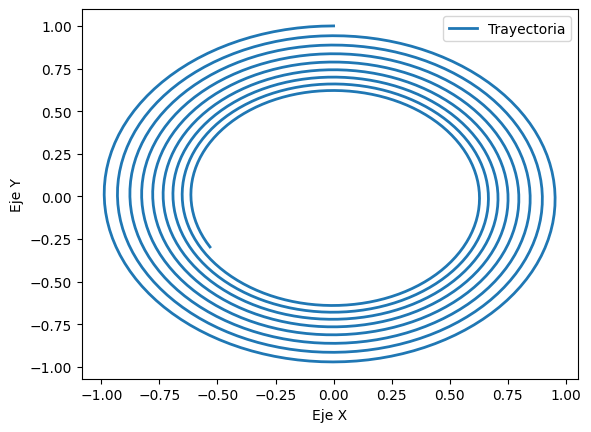

In [21]:
import scipy
from scipy import *
import matplotlib.pyplot as plt
import seaborn as sns

I = [0,2*Tmin]
t = np.linspace(I[0],I[1],1000)
c_o = scipy.optimize.minimize(perdida2,[0,0,-0.08,-0.5,1,28.9,29.3])
sol = scipy.integrate.solve_ivp(acop,I,[0,1,0,1,c_o.x[0],c_o.x[1],c_o.x[2],c_o.x[3]],dense_output=True)
solp3=sol.sol
zero_values=0
y1_valuesp3 = solp3(t)[0]
z1_valuesp3 = solp3(t)[1]
y2_valuesp3 = solp3(t)[2]
z2_valuesp3 = solp3(t)[3]

fig = plt.figure()
ax = fig.add_subplot(111)

# Grafica la trayectoria tridimensional
ax.plot(y1_valuesp3, z1_valuesp3, label='Trayectoria', lw=2)

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

plt.legend()
plt.show()

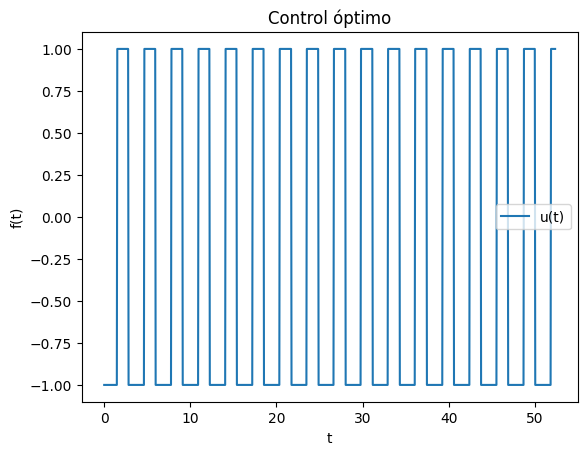

In [23]:
controll=[]
y1_valuesp3 = solp3(t)[0]
z1_valuesp3 = solp3(t)[1]
y2_valuesp3 = solp3(t)[2]
z2_valuesp3 = solp3(t)[3]
for j in t:
    controll.append(u_opt(solp3(j)[0],solp3(j)[1],solp3(j)[2],solp3(j)[3],solp3(j)[4],
                          solp3(j)[5],solp3(j)[6],solp3(j)[7],j))
plt.plot(t,controll,label='u(t)')
plt.title('Control óptimo')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()